# Example script for using GP beam fitter
Generates a test image and applies a beam mask. 
The region from the mask area is used to build a gaussian process (GP) model which is then used to predict the intensity over the full area. 

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from beam_fitting import GP_beam_fitter
from scipy.ndimage import gaussian_filter

# Generate test image

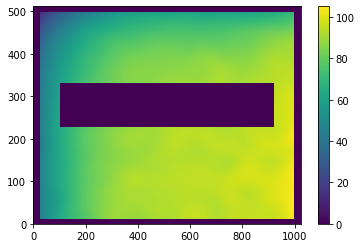

In [2]:
Nx,Ny = 1025,512
x = np.linspace(-1.0,1.0,num=Nx)
y = np.linspace(-1.0,1.0,num=Ny)
X,Y = np.meshgrid(x,y)

img = np.exp(-(X-0.2)**2-(Y+0.7)**2/1.5**2)
for n in range(1,7):
    img = img+((X-np.random.randn(1))**n)*np.random.randn(1)
    img = img+((Y-np.random.randn(1))**n)*np.random.randn(1)

img = img - np.min(img)
img_noise = gaussian_filter(1+np.random.randn(Ny,Nx),(Ny/30,Nx/30))
img = img * img_noise
beam_mask = 1.0-((np.abs(X)<0.8)*(np.abs(Y-0.1)<0.2))
beam_mask = beam_mask*(np.abs(X)<0.95)*(np.abs(Y)<0.95)
plt.pcolormesh(img*beam_mask)
plt.colorbar()

# Fit beam mask region

Null transmission mean = 1.000020
Null transmission rms = 0.002247


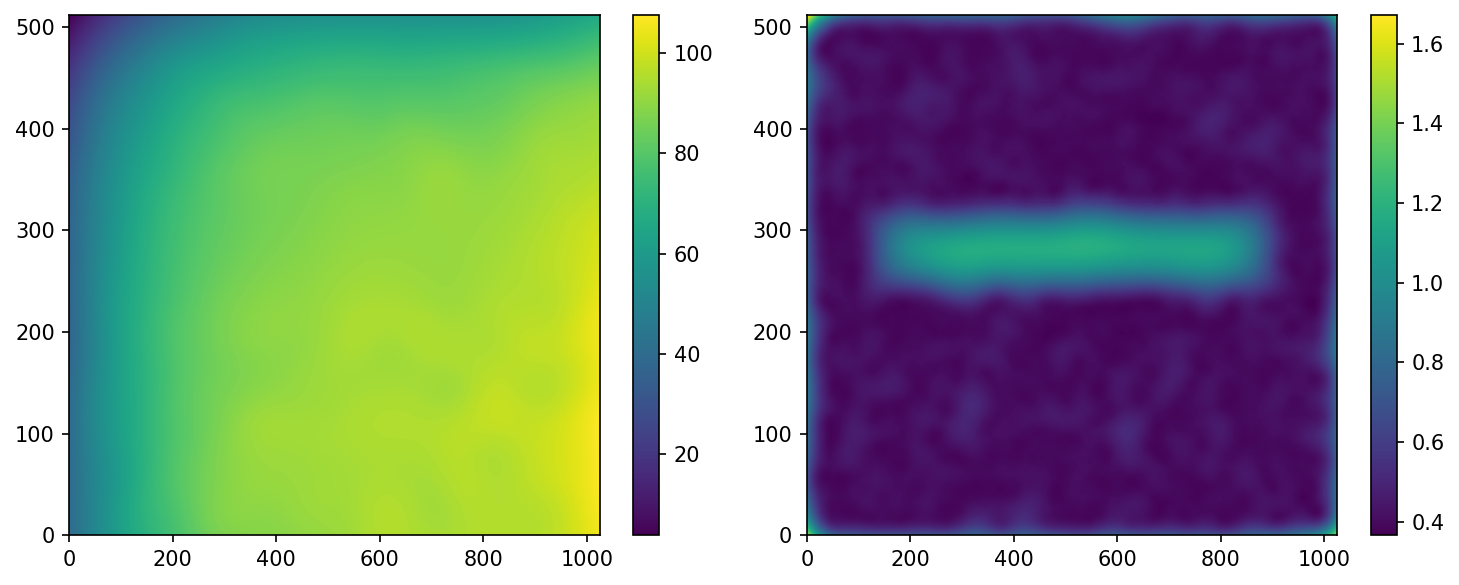

In [8]:
# mask is 
BF = GP_beam_fitter(beam_mask,N_samples=1000)
beam_estimate,beam_uncertainty = BF.fit_beam(img)

fig,ax = plt.subplots(1,2,figsize=(10,4),dpi=150)
pc1 = ax[0].pcolormesh(beam_estimate)
plt.colorbar(pc1,ax=ax[0])
pc2 = ax[1].pcolormesh(beam_uncertainty)
plt.colorbar(pc2,ax=ax[1])
plt.tight_layout()

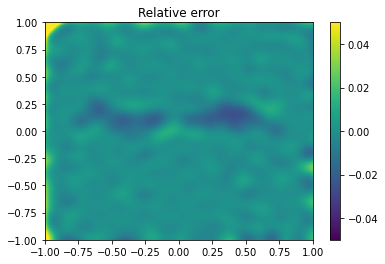

In [9]:

plt.pcolormesh(x,y,(beam_estimate-img)/beam_estimate,vmin=-0.05,vmax=0.05)
plt.colorbar()
plt.title('Relative error');
